In [58]:
import pandas as pd
import numpy as py
import seaborn as sns 
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
#import cartopy.io.shapereader as shpreader
import math
import scipy.stats as st


In [28]:
# Teammate Chris code begins here
# changes here
state_name_list = [ "Alabama", "Alaska", "Arizona", "Arkansas", "California",
                    "Colorado", "Connecticut", "DC", "Delaware", "Florida",
                    "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana",
                    "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine",
                    "Maryland", "Massachusetts", "Michigan", "Minnesota", 
                    "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada",
                    "New_Hampshire", "New_Jersey", "New_Mexico", "New_York", "North_Carolina",
                    "North_Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania",
                    "Rhode_Island", "South_Carolina", "South_Dakota", "Tennessee", "Texas",
                    "Utah", "Vermont", "Virginia", "Washington", "West_Virginia", 
                    "Wisconsin", "Wyoming"
                  ]

# An empty collection of dataframes
crime_by_state = {}


debug = False


print("Importing *.csv files...")

# Base file path we will use for reusable code
base_file_path = "Raw_Data/CrimeStateByState_"

# Import the U.S. crime data totals
file_path = base_file_path + "US" + ".csv"
if (debug):
    print(f"Importing file: {file_path}")
us_totals_df = pd.read_csv(file_path, header=5)

# Iterate over and import the state-by-state crime data
for state in state_name_list:
    file_path = base_file_path + state + ".csv"
    if (debug):
        print(f"Importing file: {file_path}")
    crime_by_state[state] = pd.read_csv(file_path, header=5)

# Import the gun ownership data
file_path = "Raw_Data/gun_ownership_by_state.csv"
if (debug):
    print(f"Importing file: {file_path}")
gun_ownership_df = pd.read_csv(file_path)

# Import the gun ownership data
file_path = "Raw_Data/State_by_State_Poverty_Rate.csv"
if (debug):
    print(f"Importing file: {file_path}")
poverty_rate_df = pd.read_csv(file_path, header=2)

print("File import complete.")

# Clean up the footer information that was at the bottom of each crime data .csv file
if debug:
    print("Cleaning up the .csv files...")
    
for state in state_name_list:
    if debug:
        print(f"The current state is {state}...")
    crime_by_state[state] = crime_by_state[state][crime_by_state[state]["Year"].astype(str).str.isnumeric()]
    
if debug:
    print(f"The current state is {state}...")
us_totals_df = us_totals_df[us_totals_df["Year"].astype(str).str.isnumeric()]

# Clean up the poverty data
poverty_rate_df["2018 Poverty Rate"] = poverty_rate_df["2018 Poverty Rate"].str.rstrip('%').apply(pd.to_numeric, errors="coerce")
poverty_rate_df["2014 Poverty Rate"] = poverty_rate_df["2014 Poverty Rate"].str.rstrip('%').apply(pd.to_numeric, errors="coerce")
poverty_rate_df["Supplemental Poverty Measure"] = poverty_rate_df["Supplemental Poverty Measure"].str.rstrip('%').apply(pd.to_numeric, errors="coerce")

if debug:
    print("Cleanup of .csv files is complete.")


Importing *.csv files...
File import complete.


In [29]:
# Reindex the gun ownership data
try:
    gun_ownership_df.set_index("State", inplace=True, drop=False)
    poverty_rate_df.set_index("State", inplace=True)
    poverty_rate_df = poverty_rate_df.drop(columns=["Rank"], axis=1)
except:
    pass

In [30]:
all_state_crime_2014 = pd.DataFrame()

# Build a dataframe of the 2014 crime data of all the states and index it to the state name
for state in state_name_list:

    if debug:
        print(f"The current state is {state}...")
    # Give each row the state name so that it can be used as an index later
    crime_by_state[state]["State"] = state
    # Use "this_state" as short-hand
    this_state = crime_by_state[state]
    # Grab the specific row we want
    this_state_crime_2014 = this_state[this_state["Year"] == "2014"]
    # We do this because .append() doesn't support "inplace"
    all_state_crime_2014 = all_state_crime_2014.append(this_state_crime_2014)
    

all_state_crime_2014.set_index(["State"], inplace=True)
# Remove bad columns
all_state_crime_2014 = all_state_crime_2014.loc[:, ~all_state_crime_2014.columns.str.contains('^Unnamed')]

try:
    gun_ownership_df = gun_ownership_df.join(all_state_crime_2014, how="outer")
    gun_ownership_df = gun_ownership_df.join(poverty_rate_df, how="outer")
    
except:
    pass

# Remove bad columns
# gun_ownership_df = gun_ownership_df.loc[:, ~gun_ownership_df.columns.str.contains('^Unnamed')]

# Drop data for US, Puerto Rico, and American Samoa
gun_ownership_df = gun_ownership_df.dropna(thresh=5)

In [31]:
# dataPoints = ['Violent crime total']
# for col in dataPoints:
#     dat = []
#     for stateName in gun_ownership_df.index:
#         if stateName in crime_by_state:
#             dat.append(crime_by_state[stateName].tail(1)[col].values[0])
#         else:
#             dat.append(None)
#     gun_ownership_df[col] = dat

gun_ownership_df.head(60)


,Rank,State,# of guns per capita,# of guns registered,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,...,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,2018 Poverty Rate,2014 Poverty Rate,Supplemental Poverty Measure
State,,,,,,,,,,,,,,,,,,,,,
Oregon,32.0,Oregon,14.816,61383.0,2014,3970239,9224,81.0,1052.0,1458.0,...,36.7,52.7,140.8,2879.0,434.0,2204.6,240.5,12.6,7.11,10.3
Wyoming,1.0,Wyoming,229.240,132806.0,2014,584153,1142,16.0,126.0,174.0,...,29.8,9.1,153.9,1964.7,289.1,1572.4,103.2,11.1,9.30,9.3
New_Hampshire,3.0,New_Hampshire,46.760,64135.0,2014,1326813,2602,12.0,458.0,594.0,...,44.8,40.5,110.0,1962.7,313.7,1584.4,64.6,7.6,9.50,15.5
Maryland,27.0,Maryland,17.030,103109.0,2014,5976407,26661,365.0,1144.0,1619.0,...,27.1,159.7,253.2,2507.5,468.7,1819.6,219.2,9.0,9.60,10.1
Vermont,42.0,Vermont,9.410,5872.0,2014,626562,622,10.0,99.0,110.0,...,17.6,11.2,68.9,1524.4,324.6,1160.8,38.9,11.0,9.70,13.4
Utah,13.0,Utah,23.480,72856.0,2014,2942902,6346,67.0,945.0,1454.0,...,49.4,44.6,119.4,2878.5,391.4,2239.1,248.0,9.0,9.80,11.6
Nebraska,38.0,Nebraska,11.570,22234.0,2014,1881503,5275,54.0,620.0,862.0,...,45.8,55.4,176.2,2523.5,422.5,1864.1,236.8,11.0,10.00,9.8
Connecticut,14.0,Connecticut,22.960,82400.0,2014,3596677,8522,86.0,571.0,782.0,...,21.7,87.8,125.0,1920.4,332.4,1418.1,169.9,10.4,10.60,12.5
Virginia,5.0,Virginia,36.340,307822.0,2014,8326289,16340,338.0,1432.0,2310.0,...,27.7,51.5,112.9,1930.3,277.7,1560.5,92.1,10.7,10.80,13.3


In [ ]:
# Teammate Chris code ends here

In [ ]:
# Teammate Carrie code begins here- Making Heat Maps 

In [ ]:
#import gun ownership data, create dataframe
gun_ownership_df=pd.read_csv("Raw_Data/gun_ownership_by_state.csv")
gun_ownership_df.set_index("State",inplace=True)
gun_ownership_df



In [ ]:
#create dataframe of just state and guns 
df2= gun_ownership_df[[ "# of guns per capita"]]
df2
gun_ownership_dict=df2.to_dict("dict")
gun_ownership_dict2={key: float(value) for (key, value) in gun_ownership_dict["# of guns per capita"].items() if key != "North"}


In [ ]:
gun_ownership_dict["# of guns per capita"]

In [ ]:

# Create HeatMap 

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection=ccrs.LambertConformal())

ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

gun_ownership_dict2
  

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('Gun Ownership Per Capita Density ')

#for state in shpreader.Reader(states_shp).geometries():
for astate in shpreader.Reader(states_shp).records():

    ### You want to replace the following code with code that sets the
    ### facecolor as a gradient based on the population density above
    #facecolor = [0.9375, 0.9375, 0.859375]

    edgecolor = 'black'

    try:
        # use the name of this state to get pop_density
        state_dens = gun_ownership_dict2[ astate.attributes['name'] ]
    except:
        state_dens = 0
    #print(state_dens)

    # simple scheme to assign color to each state
    scaled_state_dens=math.sqrt(state_dens)
    scaling_factor=1.0/math.sqrt(229.24)
    
    facecolor= (scaling_factor*scaled_state_dens, scaling_factor*scaled_state_dens,scaling_factor*scaled_state_dens)

    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)

plt.show()


In [ ]:
crime_by_state_df=pd.read_csv("Raw_Data/CrimeStatebyState_US.csv")
crime_by_state_df.head()

In [ ]:
# Heat map, robbery by state

In [ ]:
# Heat map, motor vehicle theft by state 

In [ ]:
# Teammate Carrie code begins here- Making Heat Maps 

In [ ]:
gun_ownership_by_state.txt="gun_ownership_by_state.txt"
gun_ownership_by_state.txt.head()


In [ ]:
with open ("gun_ownership_by_state.txt", "r") as myfile:
    gun_ownership=myfile.readlines()

In [ ]:
# Teammate Carrie code ends here

In [ ]:
# Teammate Matt code begins here

# Question 1: Is there a relationship between gun ownership and the murder/nonnegligent manslaughter rate?

In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))

# make a plot
ax.plot(gun_ownership_df["State"], gun_ownership_df["Murder and nonnegligent manslaughter rate"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State", color = "purple", fontsize=22)
# set y-axis label
ax.set_ylabel("Murder and manslaughter rate",color="red",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, fontsize = 16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gun_ownership_df["State"], gun_ownership_df["# of guns per capita"], color="blue",marker="o")
ax2.set_ylabel("# of guns per capita",color="blue",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, )



plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

# Question 2: Is there a relationship between gun ownership and aggravated assault? 


In [ ]:
    
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(gun_ownership_df["State"], gun_ownership_df["Aggravated assault rate"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State",color = "purple", fontsize=22)
# set y-axis label
ax.set_ylabel("Aggravated assault rate",color="red",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, fontsize = 16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gun_ownership_df["State"], gun_ownership_df["# of guns per capita"], color="blue",marker="o")
ax2.set_ylabel("# of guns per capita",color="blue",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, )


plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

# Question 2: Is there a relationship between robbery and gun ownership? 

In [ ]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(gun_ownership_df["State"], gun_ownership_df["Robbery rate"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State",color = "purple", fontsize=22)
# set y-axis label
ax.set_ylabel("Robbery rate",color="red",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, fontsize = 16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gun_ownership_df["State"], gun_ownership_df["# of guns per capita"], color="blue",marker="o")
ax2.set_ylabel("# of guns per capita",color="blue",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, )


plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

# Question 3: Is there a relationship between motor vehicle theft and gun ownership?


In [ ]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(gun_ownership_df["State"], gun_ownership_df["Motor vehicle theft rate"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State", color = "purple", fontsize=22)
# set y-axis label
ax.set_ylabel("Motor vehicle theft rate",color="red",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, fontsize = 16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gun_ownership_df["State"], gun_ownership_df["# of guns per capita"], color="blue",marker="o")
ax2.set_ylabel("# of guns per capita",color="blue",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, )


plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

# Question 4: Is there a relationship between burglary and gun ownership? 

In [ ]:

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))
# make a plot
ax.plot(gun_ownership_df["State"], gun_ownership_df["Burglary rate"], color="red", marker="o")
# set x-axis label
ax.set_xlabel("State", color = "purple", fontsize=22)
# set y-axis label
ax.set_ylabel("Burglary rate",color="red",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, fontsize = 16)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gun_ownership_df["State"], gun_ownership_df["# of guns per capita"], color="blue",marker="o")
ax2.set_ylabel("# of guns per capita",color="blue",fontsize=22)
plt.xticks(gun_ownership_df["State"], rotation=90, )


plt.show()
# save the plot as a file
fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

plt.show()

In [ ]:
# Teammate 2 code begins here

In [ ]:
# Teammate 2 code ends here

In [ ]:
# Teammate 3 code begins here

In [38]:
gun_ownership_per_capita_df = gun_ownership_df
gun_ownership_per_capita_df = gun_ownership_per_capita_df.reset_index(drop=True)
gun_ownership_per_capita_df = gun_ownership_per_capita_df[["State","# of guns per capita"]]

all_state_crime_2014_df = all_state_crime_2014
all_state_crime_2014_df = all_state_crime_2014_df.reset_index(drop=False)

murder_manslaughter_2014_df = all_state_crime_2014_df[["State","Murder and nonnegligent manslaughter rate"]]
aggravated_assault_2014_df = all_state_crime_2014_df[["State","Aggravated assault rate"]]
vehicle_theft_2014_df = all_state_crime_2014_df[["State","Motor vehicle theft rate"]]
robbery_2014_df = all_state_crime_2014_df[["State","Robbery rate"]]
burglary_2014_df = all_state_crime_2014_df[["State","Burglary rate"]]


In [48]:
import plotly.express as px
fig = px.scatter(gun_ownership_df,
                 x="2014 Poverty Rate",
                 y="Burglary rate",
                 size="2014 Poverty Rate",
                 color="State",
                 hover_name="State",
                 title="Poverty Rate in the US"
                )
fig.show()

In [35]:
import plotly.express as px
combined_data_df = pd.merge(burglary_2014_df,gun_ownership_per_capita_df,on="State")
fig = px.scatter(combined_data_df,
                 x="Burglary rate",
                 y="# of guns per capita",
                 size="Burglary rate",
                 color="State",
                 hover_name="State",
                 title="Burglary Rate in the US"
                )
fig.show()

In [ ]:
combined_data_df = pd.merge(robbery_2014_df,gun_ownership_per_capita_df,on="State")
fig = px.scatter(combined_data_df,
                 x="Robbery rate",
                 y="# of guns per capita",
                 size="Robbery rate",
                 color="State",
                 hover_name="State",
                 title="Robbery Rate in the US"
                )
fig.show()

In [ ]:
combined_data_df = pd.merge(vehicle_theft_2014_df,gun_ownership_per_capita_df,on="State")
fig = px.scatter(combined_data_df,
                 x="Motor vehicle theft rate",
                 y="# of guns per capita",
                 size="Motor vehicle theft rate",
                 color="State",
                 hover_name="State",
                 title="Motor Vehicle Theft Rate in the US"
                )
fig.show()

In [ ]:
combined_data_df = pd.merge(aggravated_assault_2014_df,gun_ownership_per_capita_df,on="State")
fig = px.scatter(combined_data_df,
                 x="Aggravated assault rate",
                 y="# of guns per capita",
                 size="Aggravated assault rate",
                 color="State",
                 hover_name="State",
                 title="Aggravated Assault Rate in the US"
                )
fig.show()

In [ ]:
combined_data_df = pd.merge(murder_manslaughter_2014_df,gun_ownership_per_capita_df,on="State")
fig = px.scatter(combined_data_df,
                 x="Murder and nonnegligent manslaughter rate",
                 y="# of guns per capita",
                 size="Murder and nonnegligent manslaughter rate",
                 color="State",
                 hover_name="State",
                 title="Murder and Manslaughter Rate in the US"
                )
fig.show()

In [ ]:
# Teammate 3 code ends here

In [69]:
# Teammate Chris code resumes here
from scipy.stats import linregress

murder_rate = gun_ownership_df["Murder and nonnegligent manslaughter rate"]
assault_rate = gun_ownership_df["Aggravated assault rate"]
GTA_rate = gun_ownership_df["Motor vehicle theft rate"]
robbery_rate = gun_ownership_df["Robbery rate"]
burglary_rate = gun_ownership_df["Burglary rate"]

gun_ownership_rate = gun_ownership_df["# of guns per capita"]
poverty_rate_2014 = gun_ownership_df["2014 Poverty Rate"]

# Calculate the correlation coefficient and linear regression model
correlation = st.pearsonr(gun_ownership_rate, murder_rate)
print(f"The correlation between State gun ownership rate and murder/manslaughter rate is {round(correlation[0],2)}")
correlation = st.pearsonr(gun_ownership_rate, assault_rate)
print(f"The correlation between State gun ownership rate and aggravated assault rate is {round(correlation[0],2)}")
correlation = st.pearsonr(gun_ownership_rate, GTA_rate)
print(f"The correlation between State gun ownership rate and motor vehicle theft rate is {round(correlation[0],2)}")
correlation = st.pearsonr(gun_ownership_rate, robbery_rate)
print(f"The correlation between State gun ownership rate and robbery rate is {round(correlation[0],2)}")
correlation = st.pearsonr(gun_ownership_rate, burglary_rate)
print(f"The correlation between State gun ownership rate and burglary rate is {round(correlation[0],2)}")
print(f"")
correlation = st.pearsonr(poverty_rate_2014, murder_rate)
print(f"The correlation between State poverty rate and murder/manslaughter rate is {round(correlation[0],2)}")
correlation = st.pearsonr(poverty_rate_2014, assault_rate)
print(f"The correlation between State poverty rate and aggravated assault rate is {round(correlation[0],2)}")
correlation = st.pearsonr(poverty_rate_2014, GTA_rate)
print(f"The correlation between State poverty rate and motor vehicle theft rate is {round(correlation[0],2)}")
correlation = st.pearsonr(poverty_rate_2014, robbery_rate)
print(f"The correlation between State poverty rate and robbery rate is {round(correlation[0],2)}")
correlation = st.pearsonr(poverty_rate_2014, burglary_rate)
print(f"The correlation between State poverty rate and burglary rate is {round(correlation[0],2)}")

The correlation between State gun ownership rate and murder/manslaughter rate is 0.08
The correlation between State gun ownership rate and aggravated assault rate is 0.07
The correlation between State gun ownership rate and motor vehicle theft rate is -0.0
The correlation between State gun ownership rate and robbery rate is 0.03
The correlation between State gun ownership rate and burglary rate is -0.12

The correlation between State poverty rate and murder/manslaughter rate is 0.48
The correlation between State poverty rate and aggravated assault rate is 0.39
The correlation between State poverty rate and motor vehicle theft rate is 0.23
The correlation between State poverty rate and robbery rate is 0.26
The correlation between State poverty rate and burglary rate is 0.5


The p-value is 0.569622875879312
The p-value with Wyoming (outlier) removed is 0.001071486430297916


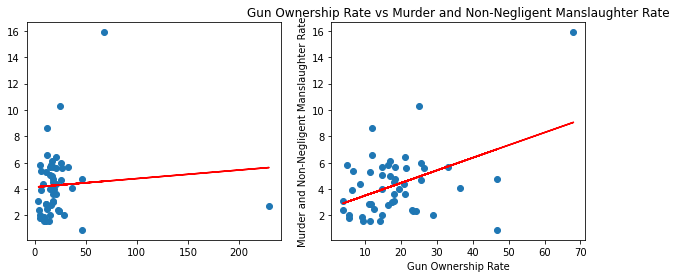

In [96]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(gun_ownership_rate, murder_rate)
regress_values = gun_ownership_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.scatter(gun_ownership_rate, murder_rate)
ax1.plot(gun_ownership_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# plot a new line with outliers removed
(slope, intercept, rvalue, new_pvalue, stderr) = linregress(gun_ownership_rate.drop(index=["Wyoming"]), murder_rate.drop(index=["Wyoming"]))
regress_values = gun_ownership_rate.drop(index=["Wyoming"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(gun_ownership_rate.drop(index=["Wyoming"]), murder_rate.drop(index=["Wyoming"]))
ax2.plot(gun_ownership_rate.drop(index=["Wyoming"]),regress_values,"r-")

plt.title("Gun Ownership Rate vs Murder and Non-Negligent Manslaughter Rate")
plt.ylabel("Murder and Non-Negligent Manslaughter Rate")
plt.xlabel("Gun Ownership Rate")

print(f"The p-value is {pvalue}")
print(f"The p-value with Wyoming (outlier) removed is {new_pvalue}")

The p-value is 0.6201494895279526
The p-value with Wyoming (outlier) removed is 0.0012701060231075684


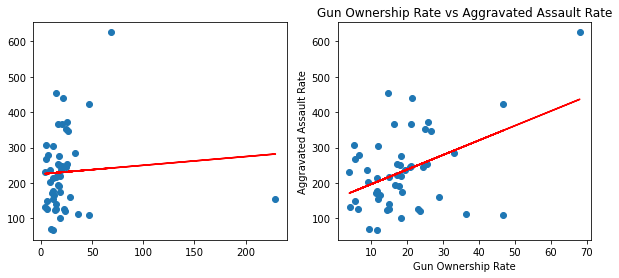

In [97]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(gun_ownership_rate, assault_rate)
regress_values = gun_ownership_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.scatter(gun_ownership_rate, assault_rate)
ax1.plot(gun_ownership_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# plot a new line with outliers removed
(slope, intercept, rvalue, new_pvalue, stderr) = linregress(gun_ownership_rate.drop(index=["Wyoming"]), assault_rate.drop(index=["Wyoming"]))
regress_values = gun_ownership_rate.drop(index=["Wyoming"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(gun_ownership_rate.drop(index=["Wyoming"]), assault_rate.drop(index=["Wyoming"]))
ax2.plot(gun_ownership_rate.drop(index=["Wyoming"]),regress_values,"r-")

plt.title("Gun Ownership Rate vs Aggravated Assault Rate")
plt.ylabel("Aggravated Assault Rate")
plt.xlabel("Gun Ownership Rate")
print(f"The p-value is {pvalue}")
print(f"The p-value with Wyoming (outlier) removed is {new_pvalue}")

The p-value is 0.9981371910960279
The p-value with Wyoming (outlier) removed is 0.01136255669878634


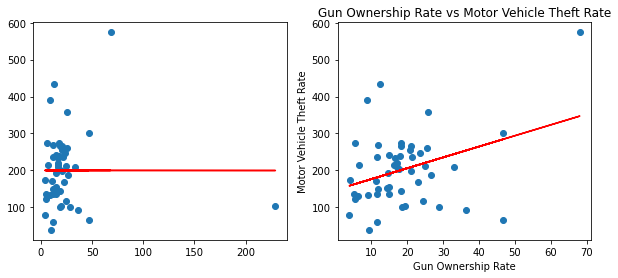

In [98]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(gun_ownership_rate, GTA_rate)
regress_values = gun_ownership_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.scatter(gun_ownership_rate, GTA_rate)
ax1.plot(gun_ownership_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# plot a new line with outliers removed
(slope, intercept, rvalue, new_pvalue, stderr) = linregress(gun_ownership_rate.drop(index=["Wyoming"]), GTA_rate.drop(index=["Wyoming"]))
regress_values = gun_ownership_rate.drop(index=["Wyoming"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(gun_ownership_rate.drop(index=["Wyoming"]), GTA_rate.drop(index=["Wyoming"]))
ax2.plot(gun_ownership_rate.drop(index=["Wyoming"]),regress_values,"r-")

plt.title("Gun Ownership Rate vs Motor Vehicle Theft Rate")
plt.ylabel("Motor Vehicle Theft Rate")
plt.xlabel("Gun Ownership Rate")
print(f"The p-value is {pvalue}")
print(f"The p-value with Wyoming (outlier) removed is {new_pvalue}")

The p-value is 0.8330119466335264
The p-value with Wyoming (outlier) removed is 0.000624429282401535


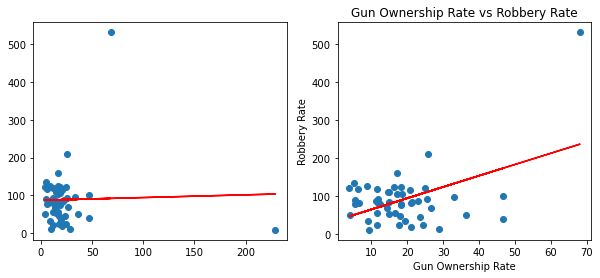

In [100]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(gun_ownership_rate, robbery_rate)
regress_values = gun_ownership_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.scatter(gun_ownership_rate, robbery_rate)
ax1.plot(gun_ownership_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# plot a new line with outliers removed
(slope, intercept, rvalue, new_pvalue, stderr) = linregress(gun_ownership_rate.drop(index=["Wyoming"]), robbery_rate.drop(index=["Wyoming"]))
regress_values = gun_ownership_rate.drop(index=["Wyoming"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(gun_ownership_rate.drop(index=["Wyoming"]), robbery_rate.drop(index=["Wyoming"]))
ax2.plot(gun_ownership_rate.drop(index=["Wyoming"]),regress_values,"r-")

plt.title("Gun Ownership Rate vs Robbery Rate")
plt.ylabel("Robbery Rate")
plt.xlabel("Gun Ownership Rate")
print(f"The p-value is {pvalue}")
print(f"The p-value with Wyoming (outlier) removed is {new_pvalue}")

The p-value is 0.41581806597234794
The p-value with Wyoming (outlier) removed is 0.2734221475741667


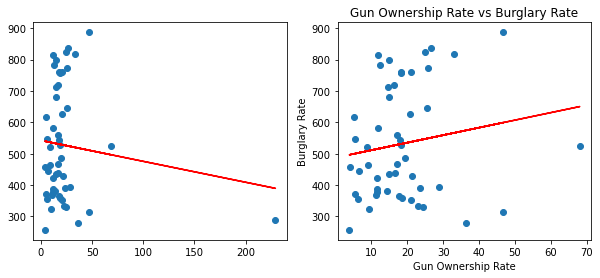

In [101]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(gun_ownership_rate, burglary_rate)
regress_values = gun_ownership_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))  # 1 row, 2 columns

ax1.scatter(gun_ownership_rate, burglary_rate)
ax1.plot(gun_ownership_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

# plot a new line with outliers removed
(slope, intercept, rvalue, new_pvalue, stderr) = linregress(gun_ownership_rate.drop(index=["Wyoming"]), burglary_rate.drop(index=["Wyoming"]))
regress_values = gun_ownership_rate.drop(index=["Wyoming"]) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
ax2.scatter(gun_ownership_rate.drop(index=["Wyoming"]), burglary_rate.drop(index=["Wyoming"]))
ax2.plot(gun_ownership_rate.drop(index=["Wyoming"]),regress_values,"r-")

plt.title("Gun Ownership Rate vs Burglary Rate")
plt.ylabel("Burglary Rate")
plt.xlabel("Gun Ownership Rate")
print(f"The p-value is {pvalue}")
print(f"The p-value with Wyoming (outlier) removed is {new_pvalue}")

The p-value is 0.00033381146143025885


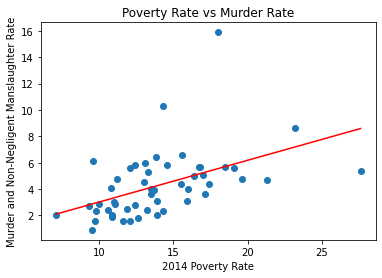

In [72]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_rate, murder_rate)
regress_values = poverty_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(poverty_rate, murder_rate)
plt.plot(poverty_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Poverty Rate vs Murder Rate")
plt.ylabel("Murder and Non-Negligent Manslaughter Rate")
plt.xlabel("2014 Poverty Rate")
print(f"The p-value is {pvalue}")

The p-value is 0.00506049974057418


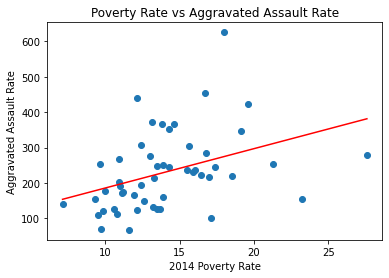

In [73]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_rate, assault_rate)
regress_values = poverty_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(poverty_rate, assault_rate)
plt.plot(poverty_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Poverty Rate vs Aggravated Assault Rate")
plt.ylabel("Aggravated Assault Rate")
plt.xlabel("2014 Poverty Rate")
print(f"The p-value is {pvalue}")

The p-value is 0.10989442496330931


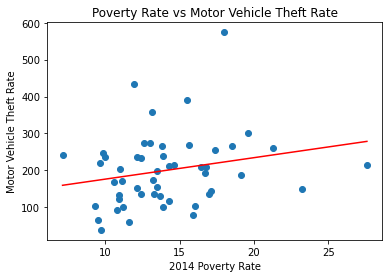

In [74]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_rate, GTA_rate)
regress_values = poverty_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(poverty_rate, GTA_rate)
plt.plot(poverty_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Poverty Rate vs Motor Vehicle Theft Rate")
plt.ylabel("Motor Vehicle Theft Rate")
plt.xlabel("2014 Poverty Rate")
print(f"The p-value is {pvalue}")

The p-value is 0.06932315092001927


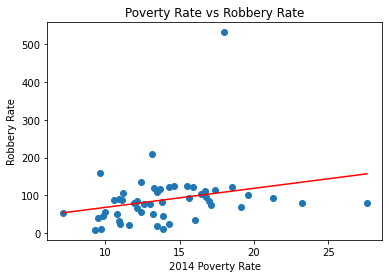

In [75]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_rate, robbery_rate)
regress_values = poverty_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(poverty_rate, robbery_rate)
plt.plot(poverty_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Poverty Rate vs Robbery Rate")
plt.ylabel("Robbery Rate")
plt.xlabel("2014 Poverty Rate")
print(f"The p-value is {pvalue}")

The p-value is 0.00016056217443156416


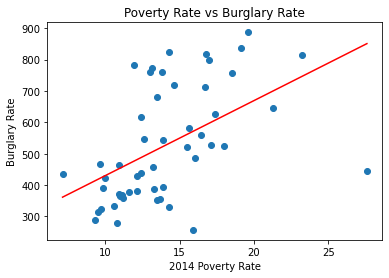

In [66]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(poverty_rate, burglary_rate)
regress_values = poverty_rate * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(poverty_rate, burglary_rate)
plt.plot(poverty_rate,regress_values,"r-")
# plt.annotate(line_eq,(1,1),fontsize=15,color="red")

plt.title("Poverty Rate vs Burglary Rate")
plt.ylabel("Burglary Rate")
plt.xlabel("2014 Poverty Rate")
print(f"The p-value is {pvalue}")